In [164]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.sdp_data.utils.process_data import *
from src.sdp_data.utils.info_mapping import *

pd.options.plotting.backend = 'holoviews'
import re

## Load data

In [126]:
csv_file_path = "../../data/_raw/edgar/edgar_file_em_tot_co2eq.csv"
df_edgar_tot = pd.read_csv(csv_file_path)
df_edgar_tot = process_df(df_edgar_tot)
df_edgar_tot.head()

,edgar_country_iso3,country,year,value
0,AIR,International Aviation,1970,171.869542
1,SEA,International Shipping,1970,375.595206
2,AFG,Afghanistan,1970,17.142304
3,ALB,Albania,1970,8.117479
4,DZA,Algeria,1970,55.065044


In [118]:
csv_file_path = "../../data/_processed/edgar_processed_ch4_n2o_co2_fgases.csv"
df_edgar_gas = pd.read_csv(csv_file_path)
df_edgar_gas = process_df(df_edgar_gas)
df_edgar_gas.head()

,country_iso3_a3,country_name,region_name,sector,gas,year,value_kt,value_mteqco2,source
0,ABW,Aruba,Amériques,Energy,CO2,1970,0.022397,0.000022,EDGAR
1,ABW,Aruba,Amériques,Energy,CO2,1970,12.228673,0.012229,EDGAR
2,ABW,Aruba,Amériques,Energy,CO2,1970,0.879948,0.000880,EDGAR
3,ABW,Aruba,Amériques,Energy,CO2,1970,0.058367,0.000058,EDGAR
4,ABW,Aruba,Amériques,Energy,CO2,1970,NaN,NaN,EDGAR


## Process data

In [124]:
df_edgar_gas_process = df_edgar_gas.groupby(['year', 'country_iso3_a3'])[['value_mteqco2','value_kt']].sum().reset_index()
df_edgar_gas_process.head()

,year,country_iso3_a3,value_mteqco2,value_kt
0,1970,ABW,0.113493,95.759401
1,1970,AFG,17.695872,3812.993972
2,1970,AGO,30.444113,20730.627902
3,1970,AIA,0.004410,2.256104
4,1970,AIR,172.200851,169311.748452


## Analyse total CO2eq differences 

In [159]:
df_merged_reg = df_edgar_gas_process.merge(df_edgar_tot, left_on=['year','country_iso3_a3'], right_on=['year','edgar_country_iso3'], how='left')
df_merged_reg["diff"] = abs(df_merged_reg["value_mteqco2"] - df_merged_reg["value"])
df_merged_reg.head()

,year,country_iso3_a3,value_mteqco2,value_kt,edgar_country_iso3,country,value,diff
0,1970,ABW,0.113493,95.759401,ABW,Aruba,0.102236,0.011256
1,1970,AFG,17.695872,3812.993972,AFG,Afghanistan,17.142304,0.553567
2,1970,AGO,30.444113,20730.627902,AGO,Angola,19.792031,10.652082
3,1970,AIA,0.004410,2.256104,AIA,Anguilla,0.004667,0.000257
4,1970,AIR,172.200851,169311.748452,AIR,International Aviation,171.869542,0.331309


In [160]:
# calculate meadian of mean average error by country 
df_merged_reg.groupby(['country_iso3_a3'])[['diff']].mean().reset_index()['diff'].median()

3.5006069186282742

In [162]:
# calculate meadian of mean average error by year 
df_merged_reg.groupby(['year'])[['diff']].mean().reset_index()['diff'].median()

22.244697211126763

In [75]:
pik_KYOTOGHG = pik[pik['gas']=='KYOTOGHG']
pik_KYOTOGHG = pik_KYOTOGHG[pik_KYOTOGHG['sector']=='Total excluding LULUCF']#pik_KYOTOGHG.groupby('country').sum()
pik_KYOTOGHG.drop(columns=['gas', 'source'], inplace=True)
pik_KYOTOGHG = pik_KYOTOGHG.groupby('country').sum()
pik_KYOTOGHG = pik_KYOTOGHG.stack().reset_index()
pik_KYOTOGHG.rename(columns={"country":"pik_country_iso3", "level_1": "year", 0: "value"}, errors="raise", inplace=True)
pik_KYOTOGHG = process_df(pik_KYOTOGHG)
pik_KYOTOGHG.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_2868\1025749077.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pik_KYOTOGHG = pik_KYOTOGHG.groupby('country').sum()


,pik_country_iso3,year,value
0,ABW,1850,0.000758
1,ABW,1851,0.000767
2,ABW,1852,0.000776
3,ABW,1853,0.000789
4,ABW,1854,0.000803


In [76]:
pik_KYOTOGHG = pik[pik['gas']=='KYOTOGHG']
pik_KYOTOGHG = pik_KYOTOGHG.drop(pik_KYOTOGHG[pik_KYOTOGHG['sector']=='Total excluding LULUCF'].index).reset_index(drop=True)#pik_KYOTOGHG[pik_KYOTOGHG['sector']=='Total excluding LULUCF']#pik_KYOTOGHG.groupby('country').sum()
pik_KYOTOGHG.drop(columns=['gas', 'source'], inplace=True)
pik_KYOTOGHG = pik_KYOTOGHG.groupby('country').sum()
pik_KYOTOGHG = pik_KYOTOGHG.stack().reset_index()
pik_KYOTOGHG.rename(columns={"country":"pik_country_iso3", "level_1": "year", 0: "value"}, errors="raise", inplace=True)
pik_KYOTOGHG = process_df(pik_KYOTOGHG)
pik_KYOTOGHG.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_2868\1856824429.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pik_KYOTOGHG = pik_KYOTOGHG.groupby('country').sum()


,pik_country_iso3,year,value
0,ABW,1850,0.000758
1,ABW,1851,0.000767
2,ABW,1852,0.000776
3,ABW,1853,0.000790
4,ABW,1854,0.000803


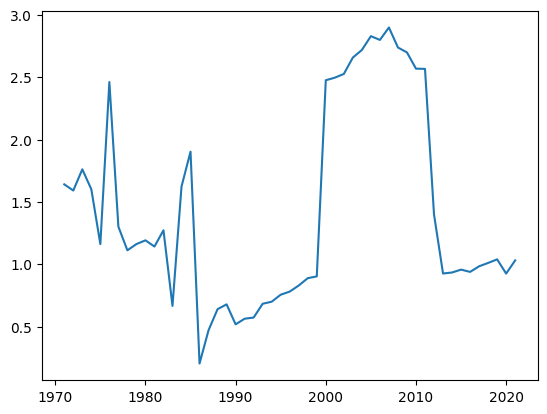

In [77]:
plt.plot(pik_KYOTOGHG[(pik_KYOTOGHG["pik_country_iso3"]=="ABW") & (pik_KYOTOGHG["year"]>1970)]["year"], pik_KYOTOGHG[(pik_KYOTOGHG["pik_country_iso3"]=="ABW") & (pik_KYOTOGHG["year"]>1970)]["value"])

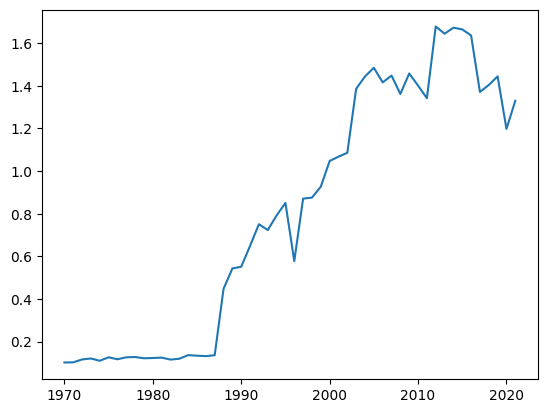

In [78]:
plt.plot(tot_co2eq[tot_co2eq["edgar_country_iso3"]=="ABW"]["year"],tot_co2eq[tot_co2eq["edgar_country_iso3"]=="ABW"]["value"])

In [92]:
tot_co2eq[(tot_co2eq["edgar_country_iso3"]=="FRA") & (tot_co2eq["year"]==2010)]

,edgar_country_iso3,country,year,value
14310,FRA,France and Monaco,2010,514.559839


In [91]:
pik_KYOTOGHG[(pik_KYOTOGHG["pik_country_iso3"]=="FRA") & (pik_KYOTOGHG["year"]==2010)]

,pik_country_iso3,year,value
11684,FRA,2010,514.17
